In [1]:
import requests
import json
from selenium import webdriver
from bs4 import BeautifulSoup
import time
from collections import Counter
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import csv
from collections import defaultdict
from datetime import datetime
import seaborn as sns
import string

sesimic, spring, cool, PuOr, hsv, twilight, Set1, prism, turbo

## <span style='color:White; background-color:Blue;'> 12.) Workflow: Data Cleaning and Processing </span>

### List of all csv files for word clouds:
##### 1.) <span style='background-color:red;'> **dict1_newest_post_titles.csv:**</span> this csv file contains counts of all the words found from all the titles of posts about artifical intelligence sorted by "newest"
##### 2.) <span style='background-color:blue;'> **dict2_newest_comments.csv:**</span> this csv file contains counts of all the words found from all the comments on posts about artifical intelligence sorted by "newest"
##### 3.) <span style='background-color:red;'> **dict3_most_comment_post_titles_word_counts_dict_final.csv:**</span> this csv file contains counts of all the words found from all the titles of posts about artifical intelligence sorted by "most comments"
##### 4.) <span style='background-color:blue;'>**dict4_relevance_comments_word_counts_dict_final.csv:**</span> this csv file contains counts of all the words found from all the comments on posts about artifical intelligence sorted by "relevance"
##### 5.) <span style='background-color:blue;'>**dict5_top_comment_word_counts_dict_final.csv:**</span> this csv file contains counts of all the words found from all the comments on posts about artifical intelligence sorted by "TOP"
##### 6.) <span style='background-color:red;'> **dict6_top_post_titles_word_counts_dict_final.csv:**</span> this csv file contains counts of all the words found from all the titles of posts about artifical intelligence sorted by "TOP"
##### 7.) <span style='background-color:red;'> **dict7_hot_post_titles_word_counts_dict_final.csv:**</span> this csv file contains counts of all the words found from all the titles of posts about artifical intelligence sorted by "HOT"
##### 8.) <span style='background-color:red;'> **dict8_hot_post_titles_past_year_word_counts_dict_final.csv:**</span> this csv file contains counts of all the words found from all the titles of posts about artifical intelligence sorted by "TOP" from the past year
##### 9.) <span style='background-color:red;'> **dict9_relevance_post_titles_past_year_word_counts_dict_final.csv:**</span> this csv file contains counts of all the words found from all the titles of posts about artifical intelligence sorted by "relevance" from the past year
##### 10.) <span style='background-color:red;'> **dict10_most_comments_post_titles_past_year_word_counts_dict_final.csv:**</span> this csv file contains counts of all the words found from all the titles of posts about artifical intelligence sorted by "most comments" from the past year

In [ ]:
dict1_newest_post_titles.csv
dict2_newest_comments.csv
dict3_most_comment_post_titles_word_counts_dict_final.csv
dict4_relevance_comments_word_counts_dict_final.csv
dict5_top_comment_word_counts_dict_final.csv
dict6_top_post_titles_word_counts_dict_final.csv
dict7_hot_post_titles_word_counts_dict_final.csv
dict8_hot_post_titles_past_year_word_counts_dict_final.csv
dict9_relevance_post_titles_past_year_word_counts_dict_final.csv
dict10_most_comments_post_titles_past_year_word_counts_dict_final.csv

In [41]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### Creating a list of stop words (words to not include in the final data because they don't add any meaning to the analysis)

In [147]:
stop_words = ['artifical','the', 'and', 'it', 'that', 'to', 'for', 'in','so','was',"it's",'at','about', 
              'is', 'are', 'we', 'i', 'be','of','a','you','as','with','but','an','not','on','or','this','by',
              'they','have', 'a','an', 'the', 'and', 'it', 'for', 'or', 'but', 'in', 'my', 'your', 'if', 'no', 'yes', 'my','what', 'from']

## 1.) Processing the data frame for the 1st csv

In [163]:
df1 = pd.read_csv('processed_data_dict_1_posts.csv')

In [164]:
df1 = df1[df1["Count"] > 2]

In [165]:
filtered_df1 = df1[~df1['Word'].isin(stop_words)]

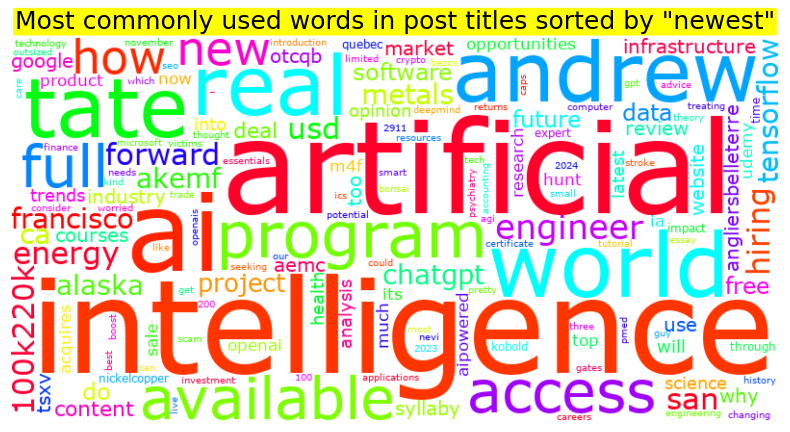

In [174]:
# Convert DataFrame to a dictionary (Word -> Count)
word_count_dict_1 = dict(zip(filtered_df1['Word'], filtered_df1['Count']))

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      font_path='/Library/Fonts/Verdana.ttf', colormap='hsv').generate_from_frequencies(word_count_dict_1)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most commonly used words in post titles sorted by "newest"', fontsize=18, color='black', 
          bbox=dict(facecolor='yellow', edgecolor='white', boxstyle='round,pad=0.1'))
plt.savefig('wordcloud.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

### Exporting the processed data from dict_1 to a csv

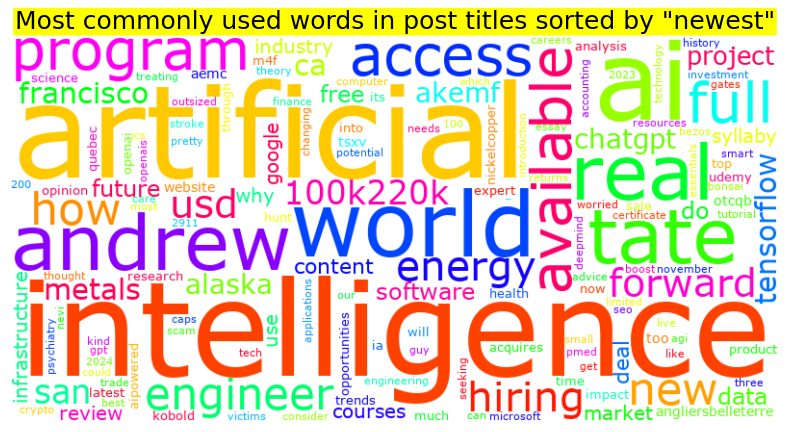

In [176]:
df1 = pd.read_csv('processed_data_dict_1_posts.csv')
df1 = df1[df1["Count"] > 2]
filtered_df1 = df1[~df1['Word'].isin(stop_words)]
word_count_dict_1 = dict(zip(filtered_df1['Word'], filtered_df1['Count']))

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      font_path='/Library/Fonts/Verdana.ttf', colormap='hsv').generate_from_frequencies(word_count_dict_1)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most commonly used words in post titles sorted by "newest"', fontsize=18, color='black', 
          bbox=dict(facecolor='yellow', edgecolor='white', boxstyle='round,pad=0.1'))
output_folder = 'Final Project'
output_path = f'{output_folder}wordcloud_1_posts.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')
plt.show()

In [54]:
with open('processed_data_dict_2_comments.csv.csv', 'w', newline='') as f:
    w = csv.writer(f)
    # Write the header if needed
    w.writerow(['Word', 'Count'])
    # Write each key-value pair as a row
    for key, value in word_count_dict_1.items():
        w.writerow([key, value])

In [182]:
stop_words_2 = ['its', 'can','out','one','our','all',
                   'from','will','like','their','just','has','would','where','there',
                   'how','where']
stop_words = ['artifical','the', 'and', 'it', 'that', 'to', 'for', 'in','so','was',"it's",'at','about', 
              'is', 'are', 'we', 'i', 'be','of','a','you','as','with','but','an','not','on','or','this','by',
              'they','have', 'a','an', 'the', 'and', 'it', 'for', 'or', 'but', 'in', 'my', 'your', 'if', 
              'no', 'yes', 'my','what', 'from']
stop_words_3 = ['its', 'can','out','one','our','all',
                   'from','will','like','their','just','has','would','where','there',
                   'how','where','artifical','the', 'and', 'it', 'that', 'to', 'for', 'in','so','was',"it's",'at','about', 
              'is', 'are', 'we', 'i', 'be','of','a','you','as','with','but','an','not','on','or','this','by',
              'they','have', 'a','an', 'the', 'and', 'it', 'for', 'or', 'but', 'in', 'my', 'your', 'if', 
              'no', 'yes', 'my','what', 'from']

## 2.) Processing the data frame for the 2nd csv

In [183]:
df2 = pd.read_csv('processed_data_dict_2_comments.csv')
df2 = df2[df2["Count"] > 2]
filtered_df2 = df2[~df2['Word'].isin(stop_words_3)]

In [68]:
len(df2)

1236

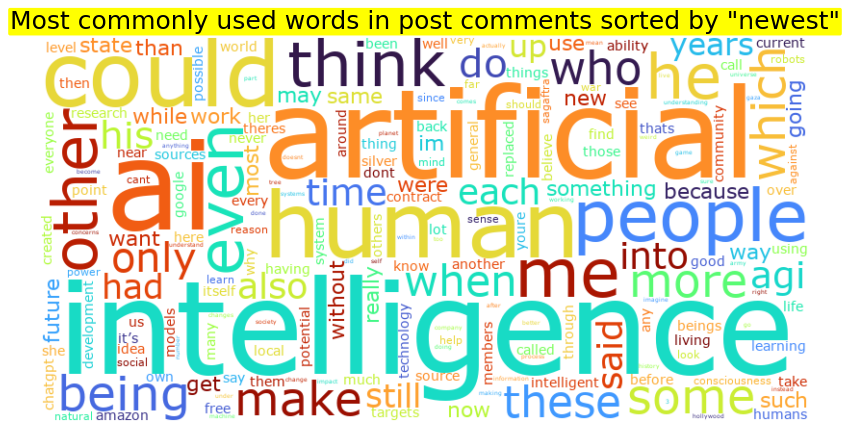

In [184]:
# Convert DataFrame to a dictionary (Word -> Count)
word_count_dict_2 = dict(zip(filtered_df2['Word'], filtered_df2['Count']))

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      font_path='/Library/Fonts/Verdana.ttf', colormap='turbo').generate_from_frequencies(word_count_dict_2)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most commonly used words in post comments sorted by "newest"', fontsize=18, color='black', 
          bbox=dict(facecolor='yellow', edgecolor='white', boxstyle='round,pad=0.1'))
output_folder = 'Final Project'
output_path = f'{output_folder}wordcloud_2_comments.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')
plt.show()

### Exporting df2 to a csv processed data

In [70]:
with open('processed_data_dict_2_comments.csv', 'w', newline='') as f:
    w = csv.writer(f)
    # Write the header if needed
    w.writerow(['Word', 'Count'])
    # Write each key-value pair as a row
    for key, value in word_count_dict_2.items():
        w.writerow([key, value])

## 3.) Processing the data frame for the 3rd csv

In [72]:
df3 = pd.read_csv('dict3_most_comment_post_titles_word_counts_dict_final.csv')
df3 = df3[df3["Count"] > 2]
filtered_df3 = df3[~df3['Word'].isin(stop_words)]

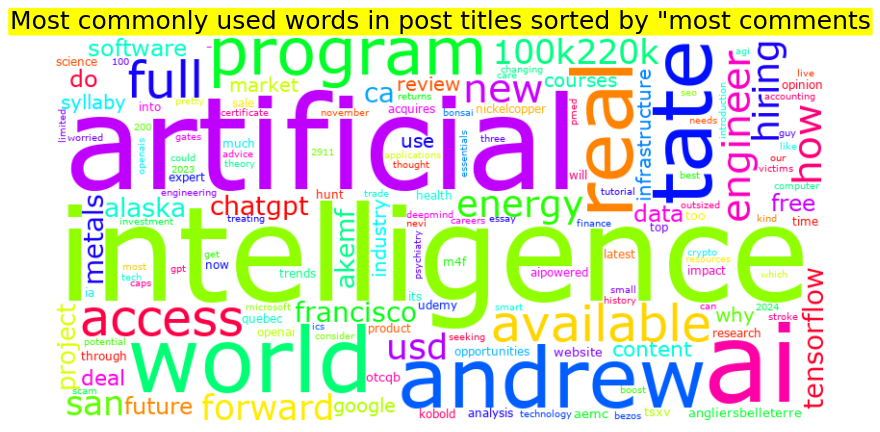

In [181]:
df3 = pd.read_csv('processed_data_dict_3_posts.csv')
df3 = df3[df3["Count"] > 2]
filtered_df3 = df3[~df3['Word'].isin(stop_words)]
word_count_dict_3 = dict(zip(filtered_df3['Word'], filtered_df3['Count']))

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      font_path='/Library/Fonts/Verdana.ttf', colormap='hsv').generate_from_frequencies(word_count_dict_1)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most commonly used words in post titles sorted by "most comments', fontsize=18, color='black', 
          bbox=dict(facecolor='yellow', edgecolor='white', boxstyle='round,pad=0.1'))
output_folder = 'Final Project'
output_path = f'{output_folder}wordcloud_3_posts.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')
plt.show()

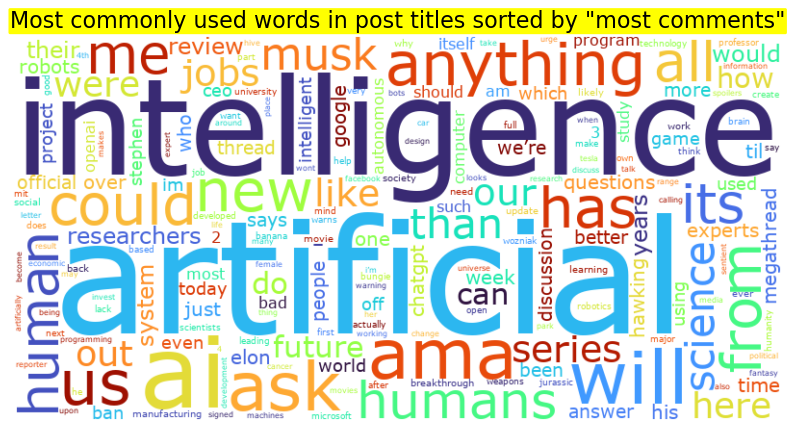

In [74]:
# Convert DataFrame to a dictionary (Word -> Count)
word_count_dict_3 = dict(zip(filtered_df3['Word'], filtered_df3['Count']))

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      font_path='/Library/Fonts/Verdana.ttf', colormap='turbo').generate_from_frequencies(word_count_dict_3)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most commonly used words in post titles sorted by "most comments"', fontsize=16, color='black', 
          bbox=dict(facecolor='yellow', edgecolor='white', boxstyle='round,pad=0.1'))
plt.savefig('wordcloud.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

### Exporting df3 to a csv processed data

In [75]:
with open('processed_data_dict_3_posts.csv', 'w', newline='') as f:
    w = csv.writer(f)
    # Write the header if needed
    w.writerow(['Word', 'Count'])
    # Write each key-value pair as a row
    for key, value in word_count_dict_3.items():
        w.writerow([key, value])

## 4.) Processing the data frame for the 4th csv

In [76]:
df4 = pd.read_csv('dict4_relevance_comments_word_counts_dict_final.csv')
df4 = df4[df4["Count"] > 2]
filtered_df4 = df4[~df4['Word'].isin(stop_words)]

In [77]:
len(df4)

1422

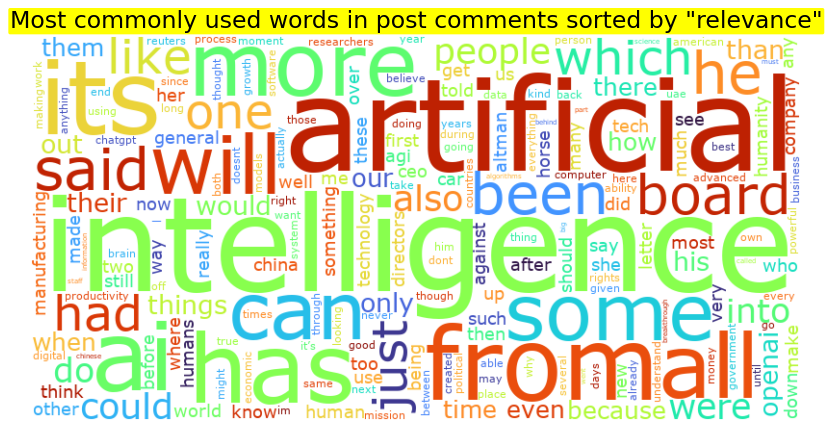

In [78]:
# Convert DataFrame to a dictionary (Word -> Count)
word_count_dict_4 = dict(zip(filtered_df4['Word'], filtered_df4['Count']))

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      font_path='/Library/Fonts/Verdana.ttf', colormap='turbo').generate_from_frequencies(word_count_dict_4)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most commonly used words in post comments sorted by "relevance"', fontsize=17, color='black', 
          bbox=dict(facecolor='yellow', edgecolor='white', boxstyle='round,pad=0.1'))
plt.savefig('wordcloud.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

### Exporting df4 to a csv processed data

In [79]:
with open('processed_data_dict_4_comments.csv', 'w', newline='') as f:
    w = csv.writer(f)
    # Write the header if needed
    w.writerow(['Word', 'Count'])
    # Write each key-value pair as a row
    for key, value in word_count_dict_4.items():
        w.writerow([key, value])

## 5.) Processing the data frame for the 5th csv

In [85]:
df5 = pd.read_csv('dict5_top_comment_word_counts_dict_final.csv')
df5 = df5[df5["Count"] > 2]
filtered_df5 = df5[~df5['Word'].isin(stop_words)]

In [86]:
len(df5)

1462

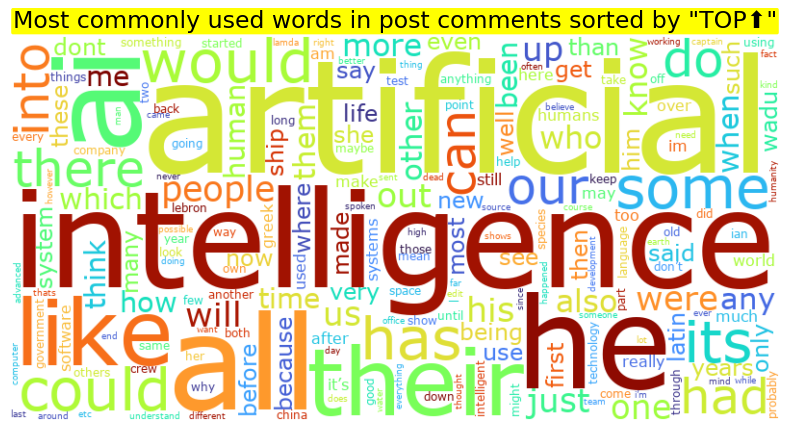

In [87]:
# Convert DataFrame to a dictionary (Word -> Count)
word_count_dict_5 = dict(zip(filtered_df5['Word'], filtered_df5['Count']))

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      font_path='/Library/Fonts/Verdana.ttf', colormap='turbo').generate_from_frequencies(word_count_dict_5)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most commonly used words in post comments sorted by "TOP⬆️"', fontsize=17, color='black', 
          bbox=dict(facecolor='yellow', edgecolor='white', boxstyle='round,pad=0.1'))
plt.savefig('wordcloud.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

### Exporting fifth df to csv

In [88]:
with open('processed_data_dict_5_comments.csv', 'w', newline='') as f:
    w = csv.writer(f)
    # Write the header if needed
    w.writerow(['Word', 'Count'])
    # Write each key-value pair as a row
    for key, value in word_count_dict_5.items():
        w.writerow([key, value])

## 6.) Processing the data frame for the 6th csv

In [89]:
df6 = pd.read_csv('dict6_top_post_titles_word_counts_dict_final.csv')
df6 = df6[df6["Count"] > 2]
filtered_df6 = df6[~df6['Word'].isin(stop_words)]

In [90]:
len(df6)

294

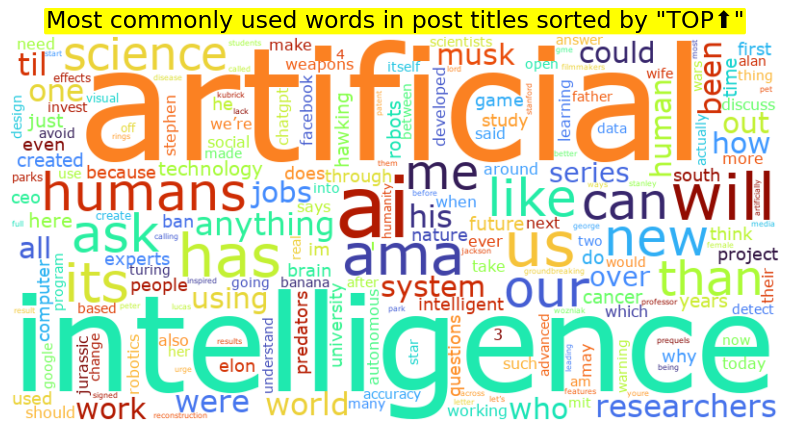

In [91]:
# Convert DataFrame to a dictionary (Word -> Count)
word_count_dict_6 = dict(zip(filtered_df6['Word'], filtered_df6['Count']))

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      font_path='/Library/Fonts/Verdana.ttf', colormap='turbo').generate_from_frequencies(word_count_dict_6)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most commonly used words in post titles sorted by "TOP⬆️"', fontsize=17, color='black', 
          bbox=dict(facecolor='yellow', edgecolor='white', boxstyle='round,pad=0.1'))
plt.savefig('wordcloud.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

### Exporting fifth df to csv

In [92]:
with open('processed_data_dict_6_posts.csv', 'w', newline='') as f:
    w = csv.writer(f)
    # Write the header if needed
    w.writerow(['Word', 'Count'])
    # Write each key-value pair as a row
    for key, value in word_count_dict_6.items():
        w.writerow([key, value])

## 7.) Processing the data frame for the 7th csv

In [93]:
df7 = pd.read_csv('dict7_hot_post_titles_word_counts_dict_final.csv')
df7 = df7[df7["Count"] > 2]
filtered_df7 = df7[~df7['Word'].isin(stop_words)]

In [94]:
len(df7)

168

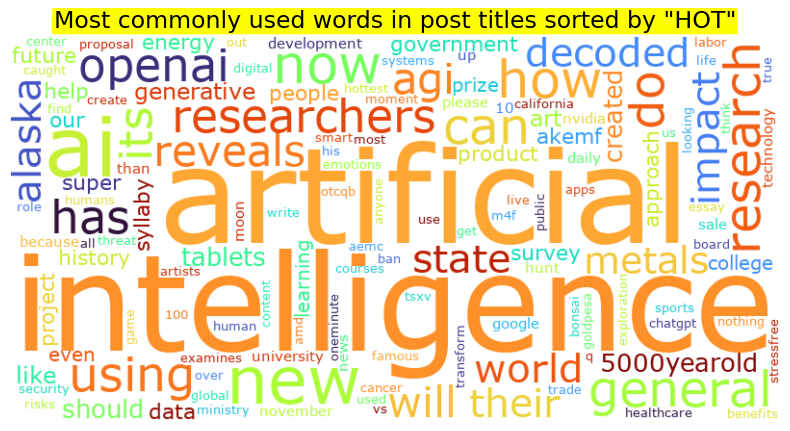

In [108]:
# Convert DataFrame to a dictionary (Word -> Count)
word_count_dict_7 = dict(zip(filtered_df7['Word'], filtered_df7['Count']))

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      font_path='/Library/Fonts/Verdana.ttf', colormap='turbo').generate_from_frequencies(word_count_dict_7)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most commonly used words in post titles sorted by "HOT"', fontsize=17, color='black', 
          bbox=dict(facecolor='yellow', edgecolor='white', boxstyle='round,pad=0.1'))
plt.savefig('wordcloud.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

### Exporting 7th df to csv

In [97]:
with open('processed_data_dict_7_posts.csv', 'w', newline='') as f:
    w = csv.writer(f)
    # Write the header if needed
    w.writerow(['Word', 'Count'])
    # Write each key-value pair as a row
    for key, value in word_count_dict_7.items():
        w.writerow([key, value])

## 8.) Processing the data frame for the 8th csv

In [98]:
df8 = pd.read_csv('dict8_hot_post_titles_past_year_word_counts_dict_final.csv')
df8 = df8[df8["Count"] > 2]
filtered_df8 = df8[~df8['Word'].isin(stop_words)]

In [99]:
len(df8)

154

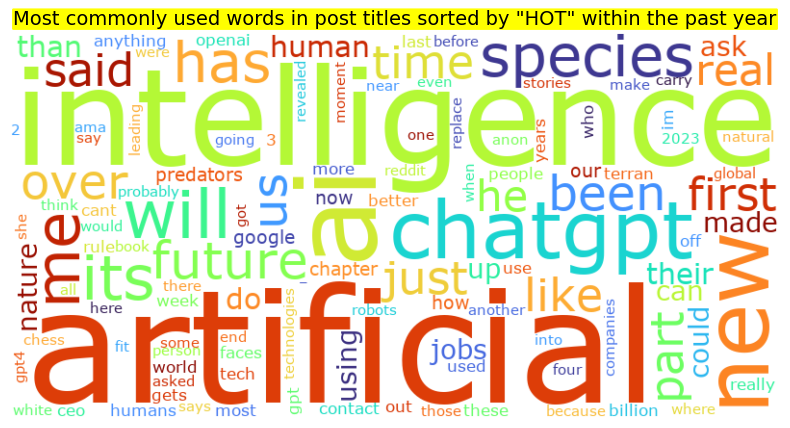

In [109]:
# Convert DataFrame to a dictionary (Word -> Count)
word_count_dict_8 = dict(zip(filtered_df8['Word'], filtered_df8['Count']))

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      font_path='/Library/Fonts/Verdana.ttf', colormap='turbo').generate_from_frequencies(word_count_dict_8)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most commonly used words in post titles sorted by "HOT" within the past year', fontsize=14, color='black', 
          bbox=dict(facecolor='yellow', edgecolor='white', boxstyle='round,pad=0.1'))
plt.savefig('wordcloud.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

#### Exporting 8th df to a csv

In [103]:
with open('processed_data_dict_8_posts.csv', 'w', newline='') as f:
    w = csv.writer(f)
    # Write the header if needed
    w.writerow(['Word', 'Count'])
    # Write each key-value pair as a row
    for key, value in word_count_dict_8.items():
        w.writerow([key, value])

## 9.) Processing the data frame for the 9th csv

In [104]:
df9 = pd.read_csv('dict9_relevance_post_titles_past_year_word_counts_dict_final.csv')
df9 = df9[df9["Count"] > 2]
filtered_df9 = df9[~df9['Word'].isin(stop_words)]

In [105]:
len(df9)

146

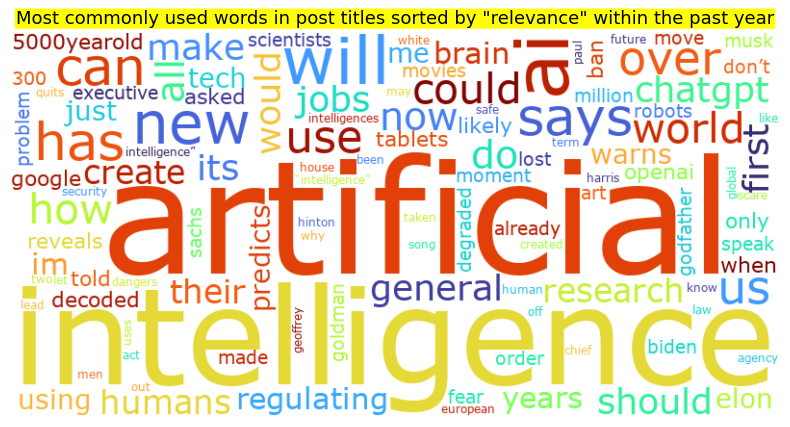

In [110]:
# Convert DataFrame to a dictionary (Word -> Count)
word_count_dict_9 = dict(zip(filtered_df9['Word'], filtered_df9['Count']))

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      font_path='/Library/Fonts/Verdana.ttf', colormap='turbo').generate_from_frequencies(word_count_dict_9)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most commonly used words in post titles sorted by "relevance" within the past year', fontsize=13, color='black', 
          bbox=dict(facecolor='yellow', edgecolor='white', boxstyle='round,pad=0.1'))
plt.savefig('wordcloud.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

### Exporting 9th df to a csv

In [107]:
with open('processed_data_dict_9_posts.csv', 'w', newline='') as f:
    w = csv.writer(f)
    # Write the header if needed
    w.writerow(['Word', 'Count'])
    # Write each key-value pair as a row
    for key, value in word_count_dict_9.items():
        w.writerow([key, value])

## 10.) Processing the data frame for the 10th csv

In [111]:
df10 = pd.read_csv('dict10_most_comments_post_titles_past_year_word_counts_dict_final.csv')
df10 = df10[df10["Count"] > 2]
filtered_df10 = df10[~df10['Word'].isin(stop_words)]

In [112]:
len(df10)

207

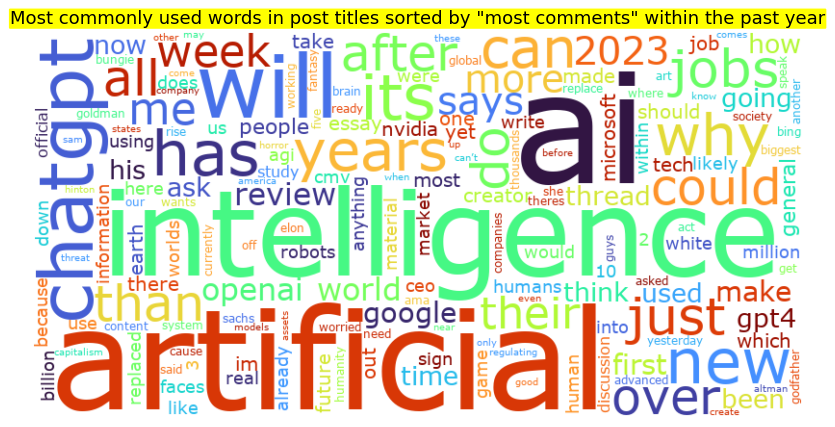

In [113]:
# Convert DataFrame to a dictionary (Word -> Count)
word_count_dict_10 = dict(zip(filtered_df10['Word'], filtered_df10['Count']))

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      font_path='/Library/Fonts/Verdana.ttf', colormap='turbo').generate_from_frequencies(word_count_dict_10)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most commonly used words in post titles sorted by "most comments" within the past year', fontsize=13, color='black', 
          bbox=dict(facecolor='yellow', edgecolor='white', boxstyle='round,pad=0.1'))
plt.savefig('wordcloud.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

### Exporting tenth df to csv

In [114]:
with open('processed_data_dict_10_posts.csv', 'w', newline='') as f:
    w = csv.writer(f)
    # Write the header if needed
    w.writerow(['Word', 'Count'])
    # Write each key-value pair as a row
    for key, value in word_count_dict_10.items():
        w.writerow([key, value])

## Combining the dfs for comments

In [121]:
list_of_comment_dfs = [filtered_df2, filtered_df4, filtered_df5]

In [122]:
# Concatenate the list of DataFrames into a single DataFrame
combined_df_comments = pd.concat(list_of_comment_dfs, ignore_index=True)

# Group by 'Word' and sum the counts
final_df_comments = combined_df_comments.groupby('Word')['Count'].sum().reset_index()

# Display the final DataFrame
print(final_df_comments)

         Word  Count
0           1     13
1          10      9
2         100      3
3        1000      4
4          11      4
...       ...    ...
2486     “the     14
2487    “this      3
2488  “uighur      3
2489      “we      3
2490    “what      3

[2491 rows x 2 columns]


In [125]:
len(filtered_df2) + len(filtered_df4) + len(filtered_df5)

4011

In [143]:
stop_words_2 = ['artifical','the', 'and', 'it', 'that', 'to', 'for', 'in','so','was',"it's",'at','about', 
              'is', 'are', 'we', 'i', 'be','of','a','you','as','with','but','an','not','on','or','this','by',
              'they','have', 'a','an', 'the', 'and', 'it', 'for', 'or', 'but', 'in', 'my', 'your', 'if', 'no', 'yes', 'my','what', 'from', 'he', 'has','will','all',
             'also','how','only','also','some','can','could','do','he','some','would','its','just','like','their','out','which','our','said','when','who']

In [144]:
#df_comments = pd.read_csv('dict10_most_comments_post_titles_past_year_word_counts_dict_final.csv')
df_comments = final_df_comments[final_df_comments["Count"] > 2]
filtered_df_comments = df_comments[~df_comments['Word'].isin(stop_words_2)]

In [145]:
len(filtered_df_comments)

2468

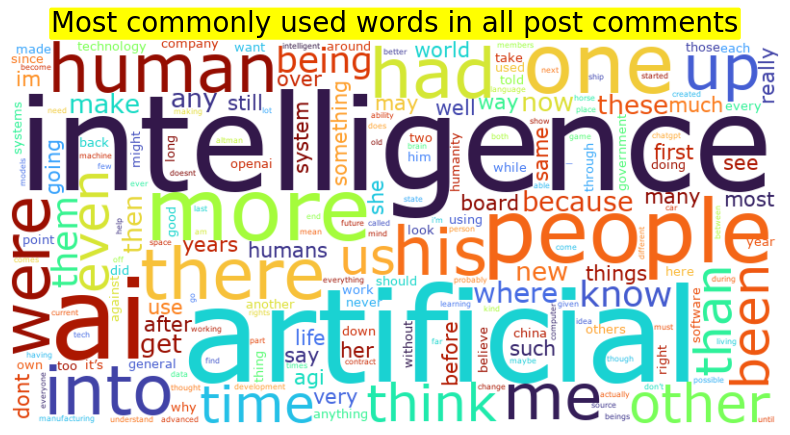

In [153]:
# Convert DataFrame to a dictionary (Word -> Count)
word_count_final_dict = dict(zip(filtered_df_comments['Word'], filtered_df_comments['Count']))

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      font_path='/Library/Fonts/Verdana.ttf', colormap='turbo').generate_from_frequencies(word_count_final_dict)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most commonly used words in all post comments', fontsize=20, color='black', 
          bbox=dict(facecolor='yellow', edgecolor='white', boxstyle='round,pad=0.1'))
plt.savefig('wordcloud.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

### Exporting final comments count to csv

In [148]:
with open('final_comments_combined.csv', 'w', newline='') as f:
    w = csv.writer(f)
    # Write the header if needed
    w.writerow(['Word', 'Count'])
    # Write each key-value pair as a row
    for key, value in word_count_final_dict.items():
        w.writerow([key, value])

#### Combining the dfs for post titles

In [151]:
list_of_post_dfs = [filtered_df1, filtered_df3, filtered_df6, filtered_df7, filtered_df8, filtered_df9, filtered_df10]
# Concatenate the list of DataFrames into a single DataFrame
combined_df_posts = pd.concat(list_of_post_dfs, ignore_index=True)

# Group by 'Word' and sum the counts
final_df_posts = combined_df_posts.groupby('Word')['Count'].sum().reset_index()

# Display the final DataFrame
print(final_df_posts)

          Word  Count
0            1     13
1           10     13
2          100      9
3         1000      4
4     100k220k     10
...        ...    ...
2660      “the     14
2661     “this      3
2662   “uighur      3
2663       “we      3
2664     “what      3

[2665 rows x 2 columns]


In [160]:
#df_comments = pd.read_csv('dict10_most_comments_post_titles_past_year_word_counts_dict_final.csv')
df_posts = final_df_posts[final_df_posts["Count"] > 2]
filtered_df_posts = df_posts[~df_posts['Word'].isin(stop_words_2)]

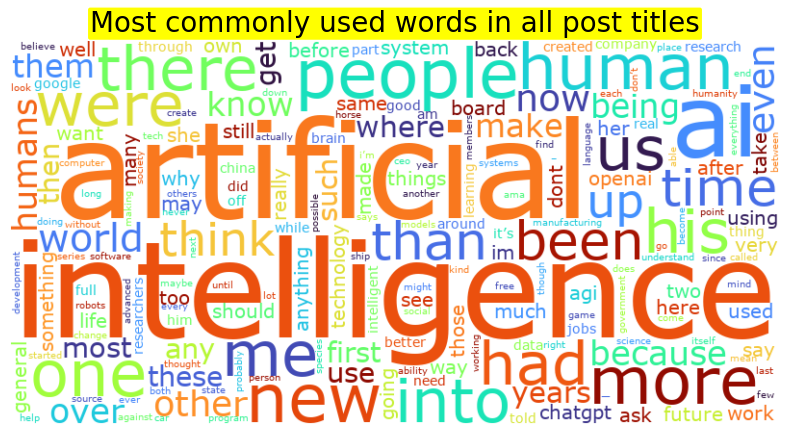

In [161]:
# Convert DataFrame to a dictionary (Word -> Count)
word_count_final_dict_2 = dict(zip(filtered_df_posts['Word'], filtered_df_posts['Count']))

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      font_path='/Library/Fonts/Verdana.ttf', colormap='turbo').generate_from_frequencies(word_count_final_dict_2)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most commonly used words in all post titles', fontsize=20, color='black', 
          bbox=dict(facecolor='yellow', edgecolor='white', boxstyle='round,pad=0.1'))
plt.savefig('wordcloud.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

### Exporting final comments count to csv

In [162]:
with open('final_posts_combined.csv', 'w', newline='') as f:
    w = csv.writer(f)
    # Write the header if needed
    w.writerow(['Word', 'Count'])
    # Write each key-value pair as a row
    for key, value in word_count_final_dict_2.items():
        w.writerow([key, value])

### List of all csv files for main csv files:

In [9]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=link&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=45be8084-75f1-429d-bb14-0d47161d63b1&t=all&sort=top"

# Using the safari driver
driver = webdriver.Safari()

# Opening the URL
driver.get(url)

# Scroll down to load more content, here I went to ten because that is the maximum amount of times it can scroll
for i in range(10):  
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3) #: I will need a longer sleep time if I'm trying to load more titles

# Getting the updated HTML content
html_content = driver.page_source

# Closing the browser
driver.quit()

# Parsing the html content using BS
soup = BeautifulSoup(html_content, "html.parser")
final_top_date_time_vote_comment_dict = []
invisible_tags = soup.find_all("time")
invisible_tags_titles = soup.find_all("span", class_="invisible")
vote_comment_divs = soup.find_all('div', class_='text-neutral-content-weak text-12')
name_tags = soup.find_all("a", class_= "flex items-center text-neutral-content-weak font-semibold")

# Iterate over both lists simultaneously using zip
for time_tag, title_tag, div, name_tag in zip(invisible_tags, invisible_tags_titles, vote_comment_divs, name_tags):
    # Extract date information from the <time> tag
    date_value = time_tag['title']
    # Extract post title from the <span> tag
    title = title_tag.get_text(strip=True)

    # Extract votes
    votes_tag = div.find('faceplate-number', {'pretty': ''})
    votes = votes_tag['number']

    # Extract comments
    comments_tag = div.find('span', string='comments')
    comments = comments_tag.find_previous('faceplate-number')['number']
    subreddit = name_tag["href"]
    # Print both date, title, votes, and comments
    #print(f"Date: {date_value}, Title: {title}, Votes = {votes}, Comments = {comments}, Subreddit= {subreddit}")
    final_top_date_time_vote_comment_dict.append({
        "Title": title,
        "Subreddit": subreddit,
        "Date": date_value,
        "Votes": int(votes),
        "Comments": int(comments),  
    })

In [3]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=link&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=fc7a51aa-31c1-4df4-8e8d-f632f66fcbb3&t=all&sort=comments"
response = requests.get(url)
response.status_code 

# Using the safari driver
driver = webdriver.Safari()

# Opening the URL
driver.get(url)

# Scroll down to load more content, here I went to ten because that is the maximum amount of times it can scroll
for i in range(10):  
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3) #: I will need a longer sleep time if I'm trying to load more titles

# Getting the updated HTML content
html_content = driver.page_source

# Closing the browser
driver.quit()

# Parsing the html content using BS
soup = BeautifulSoup(html_content, "html.parser")
final_most_coments_date_time_vote_comment_dict = []
invisible_tags = soup.find_all("time")
invisible_tags_titles = soup.find_all("span", class_="invisible")
vote_comment_divs = soup.find_all('div', class_='text-neutral-content-weak text-12')
name_tags = soup.find_all("a", class_= "flex items-center text-neutral-content-weak font-semibold")

# Iterate over both lists simultaneously using zip
for time_tag, title_tag, div, name_tag in zip(invisible_tags, invisible_tags_titles, vote_comment_divs, name_tags):
    # Extract date information from the <time> tag
    date_value = time_tag['title']
    # Extract post title from the <span> tag
    title = title_tag.get_text(strip=True)

    # Extract votes
    votes_tag = div.find('faceplate-number', {'pretty': ''})
    votes = votes_tag['number']

    # Extract comments
    comments_tag = div.find('span', string='comments')
    comments = comments_tag.find_previous('faceplate-number')['number']
    subreddit = name_tag["href"]
    # Print both date, title, votes, and comments
    #print(f"Date: {date_value}, Title: {title}, Votes = {votes}, Comments = {comments}, Subreddit= {subreddit}")
    final_most_coments_date_time_vote_comment_dict.append({
        "Title": title,
        "Subreddit": subreddit,
        "Date": date_value,
        "Votes": int(votes),
        "Comments": int(comments),  
    })

In [4]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=link&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=02b2cbc7-61a7-40dc-952f-34bbb143a748&sort=relevance"
response = requests.get(url)
response.status_code 

# Using the safari driver
driver = webdriver.Safari()

# Opening the URL
driver.get(url)

# Scroll down to load more content, here I went to ten because that is the maximum amount of times it can scroll
for i in range(10):  
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3) #: I will need a longer sleep time if I'm trying to load more titles

# Getting the updated HTML content
html_content = driver.page_source

# Closing the browser
driver.quit()

# Parsing the html content using BS
soup = BeautifulSoup(html_content, "html.parser")
final_relevance_date_time_vote_comment_dict = []
invisible_tags = soup.find_all("time")
invisible_tags_titles = soup.find_all("span", class_="invisible")
vote_comment_divs = soup.find_all('div', class_='text-neutral-content-weak text-12')
name_tags = soup.find_all("a", class_= "flex items-center text-neutral-content-weak font-semibold")

# Iterate over both lists simultaneously using zip
for time_tag, title_tag, div, name_tag in zip(invisible_tags, invisible_tags_titles, vote_comment_divs, name_tags):
    # Extract date information from the <time> tag
    date_value = time_tag['title']
    # Extract post title from the <span> tag
    title = title_tag.get_text(strip=True)

    # Extract votes
    votes_tag = div.find('faceplate-number', {'pretty': ''})
    votes = votes_tag['number']

    # Extract comments
    comments_tag = div.find('span', string='comments')
    if comments_tag:
        # Find the previous 'faceplate-number' tag
        comments_number_tag = comments_tag.find_previous('faceplate-number')
        # Check if the 'comments_number_tag' is not None before accessing its attributes
        if comments_number_tag:
            comments = int(comments_number_tag['number'])
        else:
            comments = -1  # Set a default value, e.g., -1
    else:
        comments = -1  # Set a default value, e.g., -1
    #comments = comments_tag.find_previous('faceplate-number')['number']
    subreddit = name_tag["href"]
    # Print both date, title, votes, and comments
    #print(f"Date: {date_value}, Title: {title}, Votes = {votes}, Comments = {comments}, Subreddit= {subreddit}")
    final_relevance_date_time_vote_comment_dict.append({
        "Title": title,
        "Subreddit": subreddit,
        "Date": date_value,
        "Votes": int(votes),
        "Comments": int(comments),  
    })

In [5]:
len(final_top_date_time_vote_comment_dict) # posts by TOP from all time

247

In [8]:
len(final_most_coments_date_time_vote_comment_dict) # posts by "most comments" from all time

243

In [7]:
len(final_relevance_date_time_vote_comment_dict) # posts by relevance from all time

249

### Combining the data into one list then to a csv

In [13]:
combined_list = []
combined_list.extend(final_top_date_time_vote_comment_dict)
combined_list.extend(final_most_coments_date_time_vote_comment_dict)
combined_list.extend(final_relevance_date_time_vote_comment_dict)

In [15]:
csv_file_path = 'post_data_from_all_time_top_relevance_most-comments.csv'  # Change this to the desired file path

# Write the header and data to the CSV file
with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = combined_list[0].keys()  # Assumes all dictionaries have the same keys
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for row in combined_list:
        writer.writerow(row)

print(f"CSV file created at: {csv_file_path}")

CSV file created at: post_data_from_all_time_top_relevance_most-comments.csv


In [242]:
stop_words_x = ['artifical','the', 'and', 'it', 'that', 'to', 'for', 'in','so','was',"it's",'at','about', 
              'is', 'are', 'we', 'i', 'be','of','a','you','as','with','but','an','not','on','or','this','by',
              'they','have', 'a','an', 'the', 'and', 'it', 'for', 'or', 'but', 'in', 'my', 'your', 'if', 'no', 'yes', 'my','what', 'from', 'he', 'has','will','all',
             'also','how','only','also','some','can','could','do','he','some','would','its','just','like','their','out','which','our','said','when','who',
             'its', 'can','out','one','our','all',
                   'from','will','like','their','just','has','would','where','there',
                   'how','where','were','us','into','more','been','than','time','up','new','even','now',
               'other','because','these','such','then','ai','say',
                'had','over','humans','make','any','them','years','use','get','most','first']

In [243]:
df = pd.read_csv("final_posts_combined.csv")

Total unique words: 2610
Total word count: 31278
Top 10 most common words in post titles(other than "artifical" and "intelligence":
         Word  Count
1715   people    204
1160    human    182
1478       me    174
1136      his    167
2349    think    138
2590    world    138
284     being    111
1323     know    111
422   chatgpt     87
2348   things     85


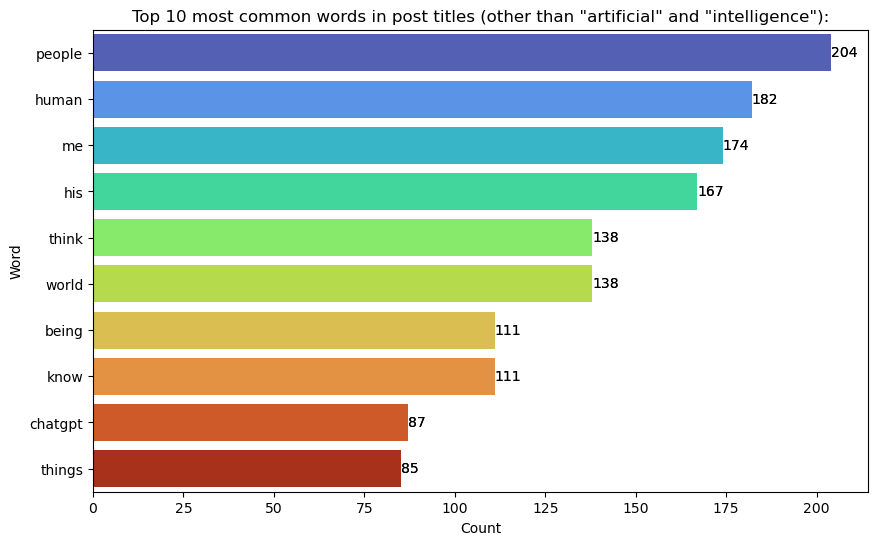

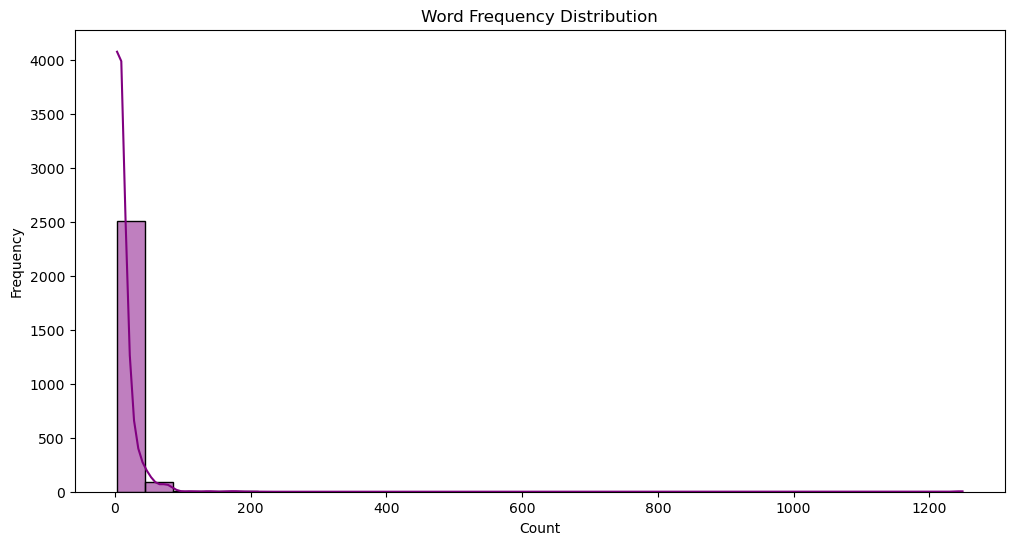

In [249]:
df = df[~df['Word'].isin(stop_words_x)]

total_unique_words = df['Word'].nunique() # <------
print(f"Total unique words: {total_unique_words}")

# Total count of words
total_word_count = df['Count'].sum() # <------
print(f"Total word count: {total_word_count}")

# Most common words
most_common_words = df.nlargest(12, 'Count')[2:] # <------
print('Top 10 most common words in post titles(other than "artifical" and "intelligence":')
print(most_common_words)

# Plot a bar chart of the top 10 words
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=most_common_words, palette='turbo') # <------
ax = sns.barplot(x='Count', y='Word', data=most_common_words, palette='turbo')

# Display count values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=10, color='black')
plt.title('Top 10 most common words in post titles (other than "artificial" and "intelligence"):')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

# Word frequency distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Count'], bins=30, kde=True, color='purple') # <------
plt.title('Word Frequency Distribution')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()


In [190]:
len(filtered_df1) + len(filtered_df3) + len(filtered_df6) + len(filtered_df7) + len(filtered_df8) + len(filtered_df9) + len(filtered_df10)


3495

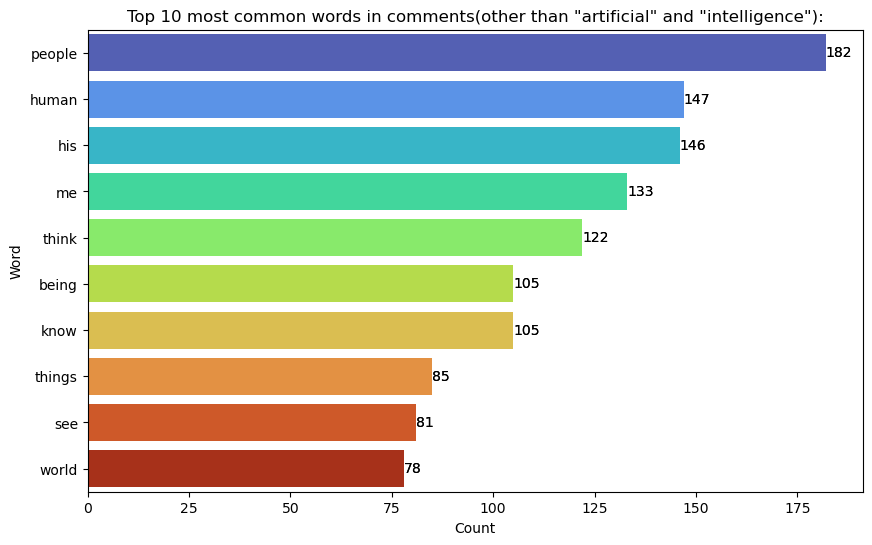

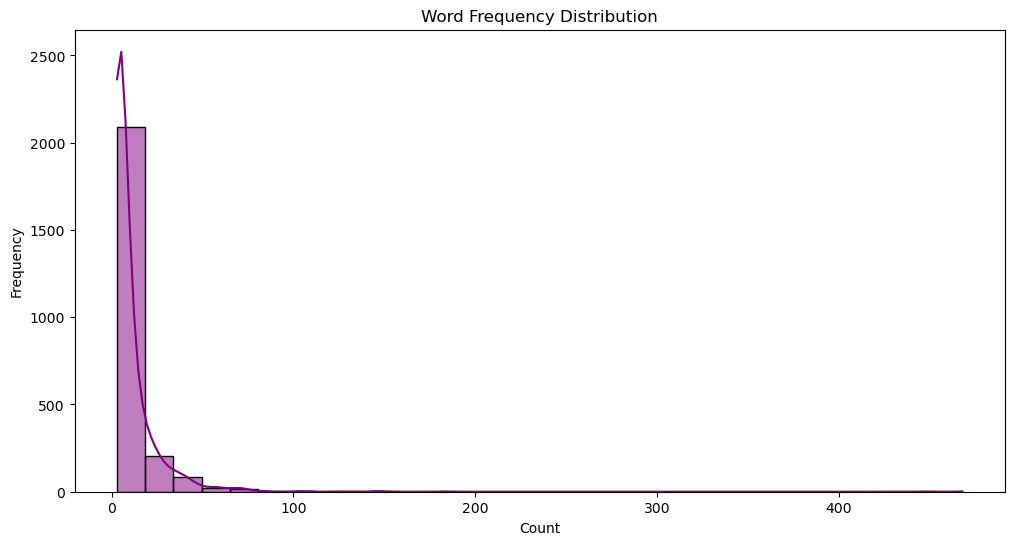

In [252]:
df = pd.read_csv("final_comments_combined.csv")
df = df[~df['Word'].isin(stop_words_y)]

# Most common words
most_common_words = df.nlargest(12, 'Count')[2:] # <------

# Plot a bar chart of the top 10 words
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=most_common_words, palette='turbo') # <------
ax = sns.barplot(x='Count', y='Word', data=most_common_words, palette='turbo')

# Display count values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=10, color='black')
plt.title('Top 10 most common words in comments(other than "artificial" and "intelligence"):')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

# Word frequency distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Count'], bins=30, kde=True, color='purple') # <------
plt.title('Word Frequency Distribution')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()


In [264]:
df= pd.read_csv("post_data_from_all_time_top_relevance_most-comments.csv")

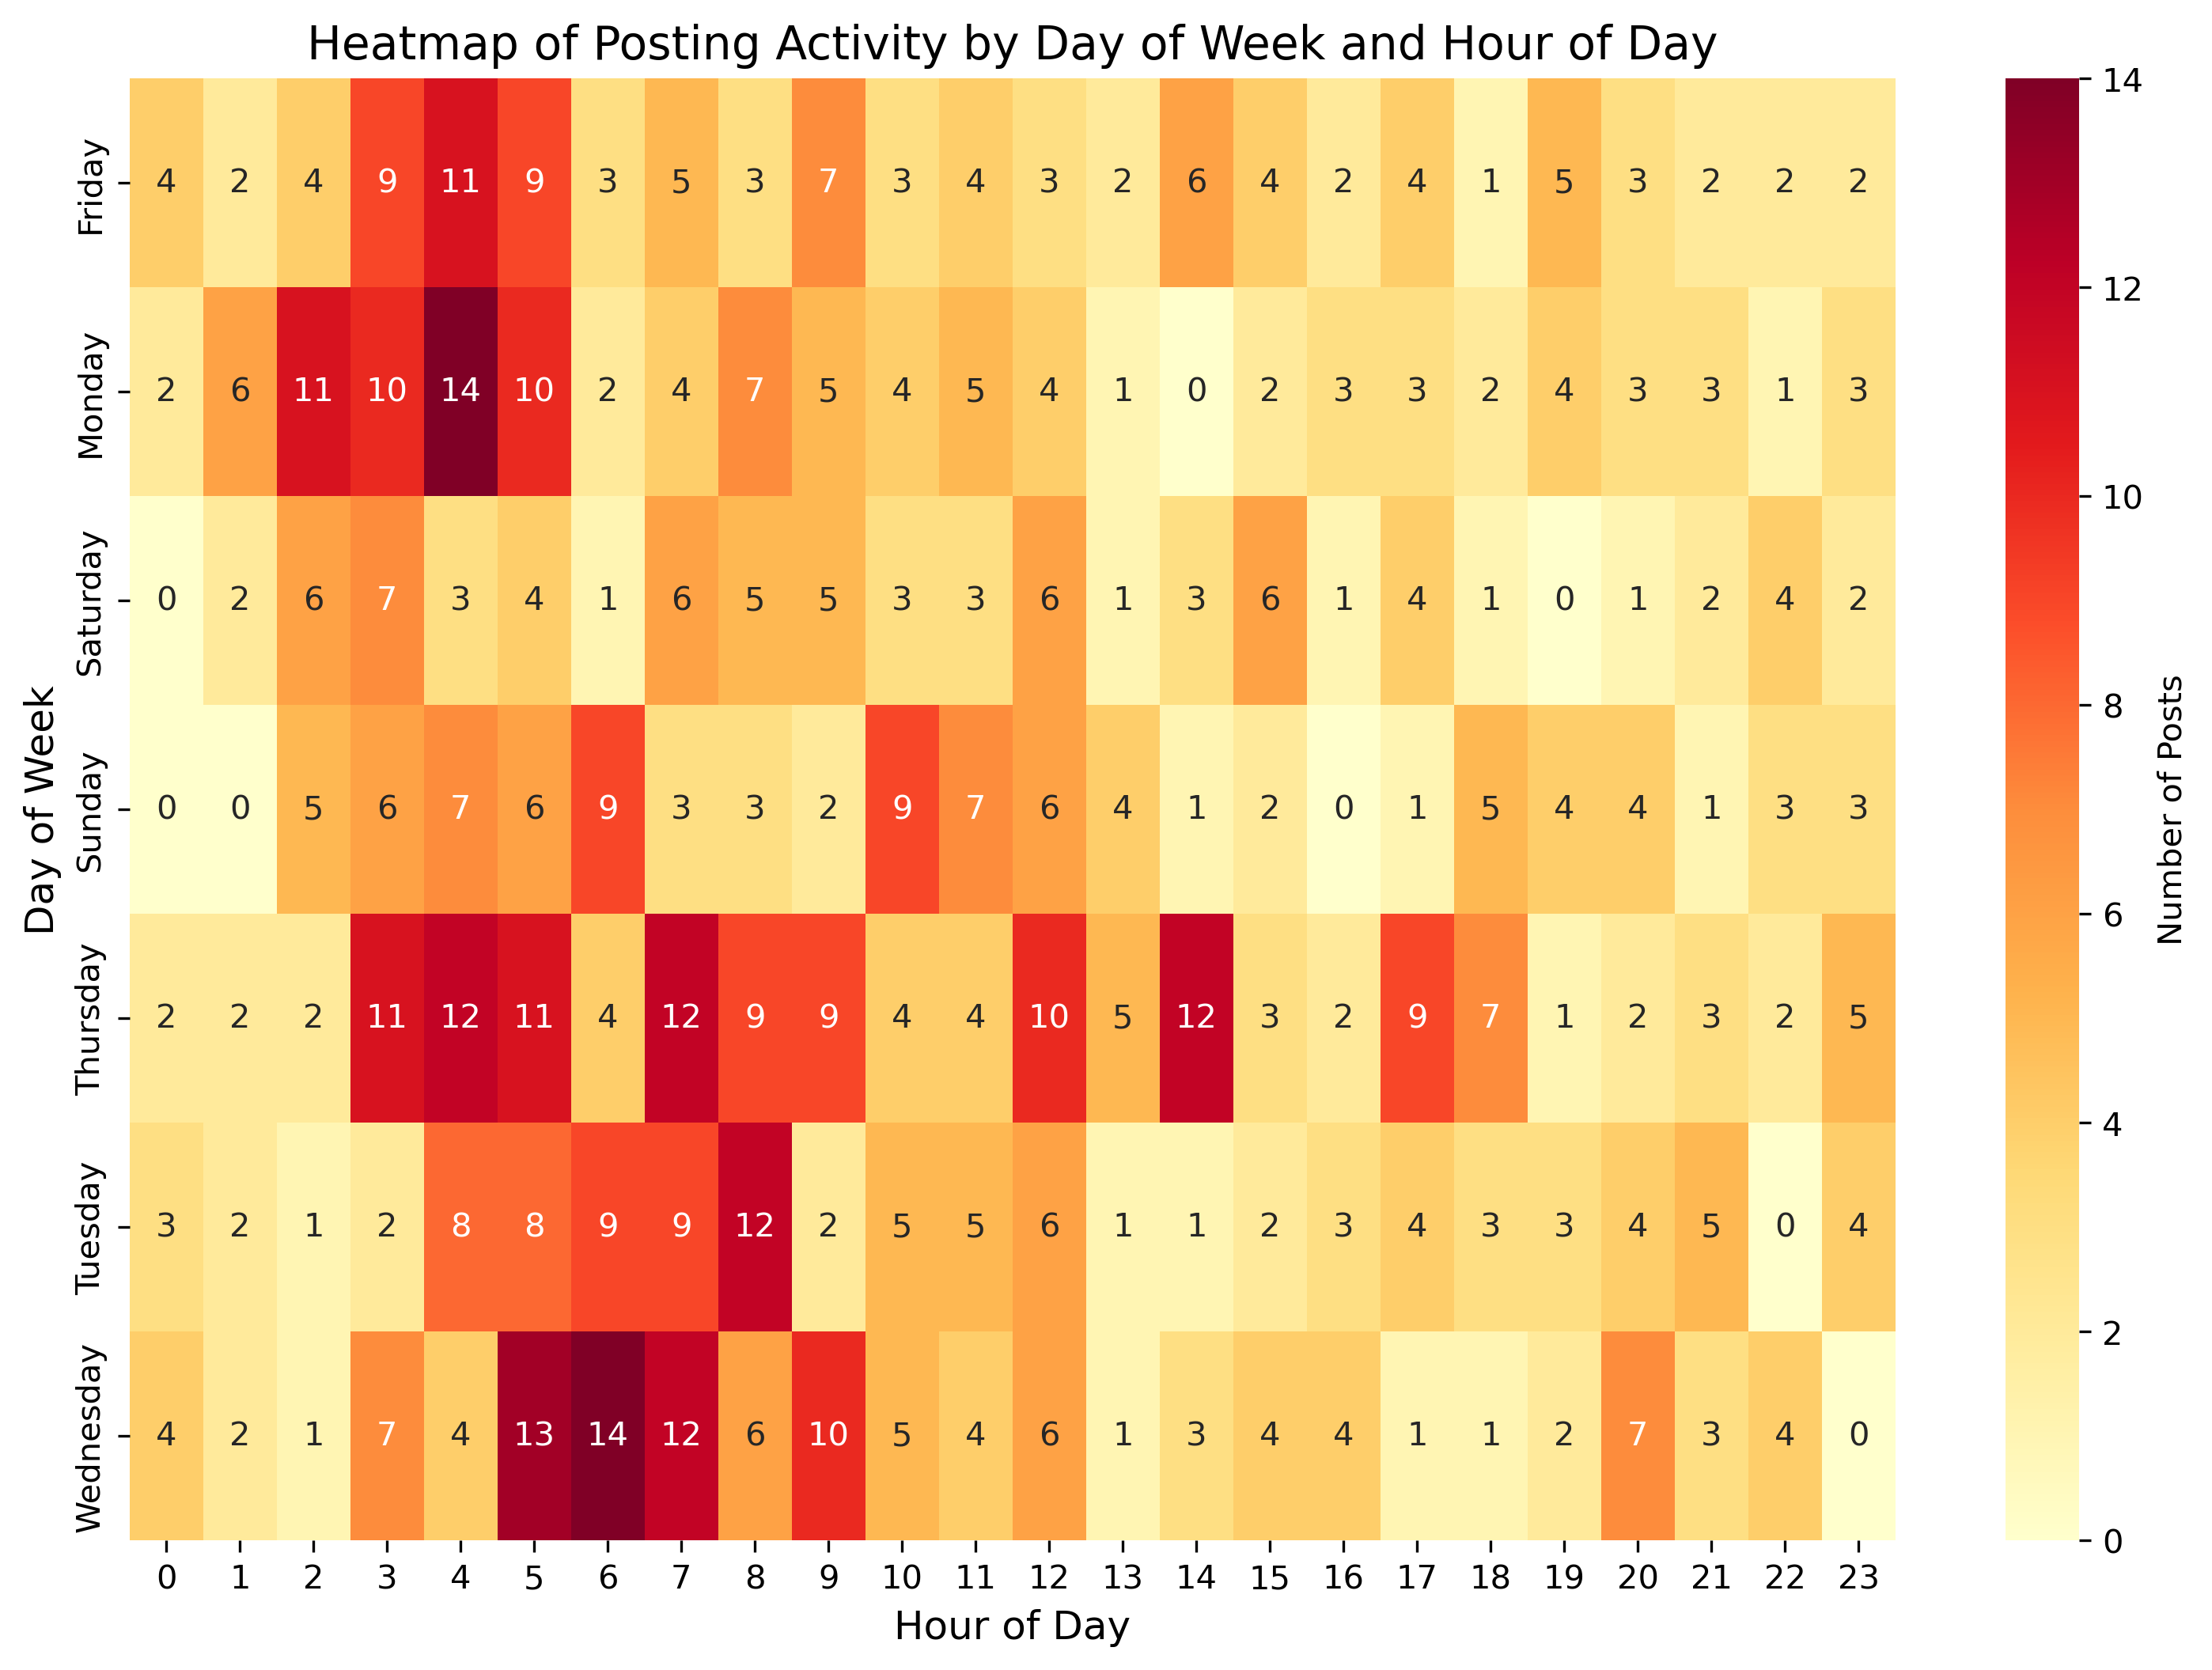

In [324]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df['DayOfWeek'] = df['Date'].dt.day_name()
df['HourOfDay'] = df['Date'].dt.hour
heatmap_data = df.pivot_table(index='DayOfWeek', columns='HourOfDay', 
                              values='Title', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 8), dpi=300)
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt="d", cbar_kws={'label': 'Number of Posts'})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.title('Heatmap of Posting Activity by Day of Week and Hour of Day', fontsize=14)
plt.show()


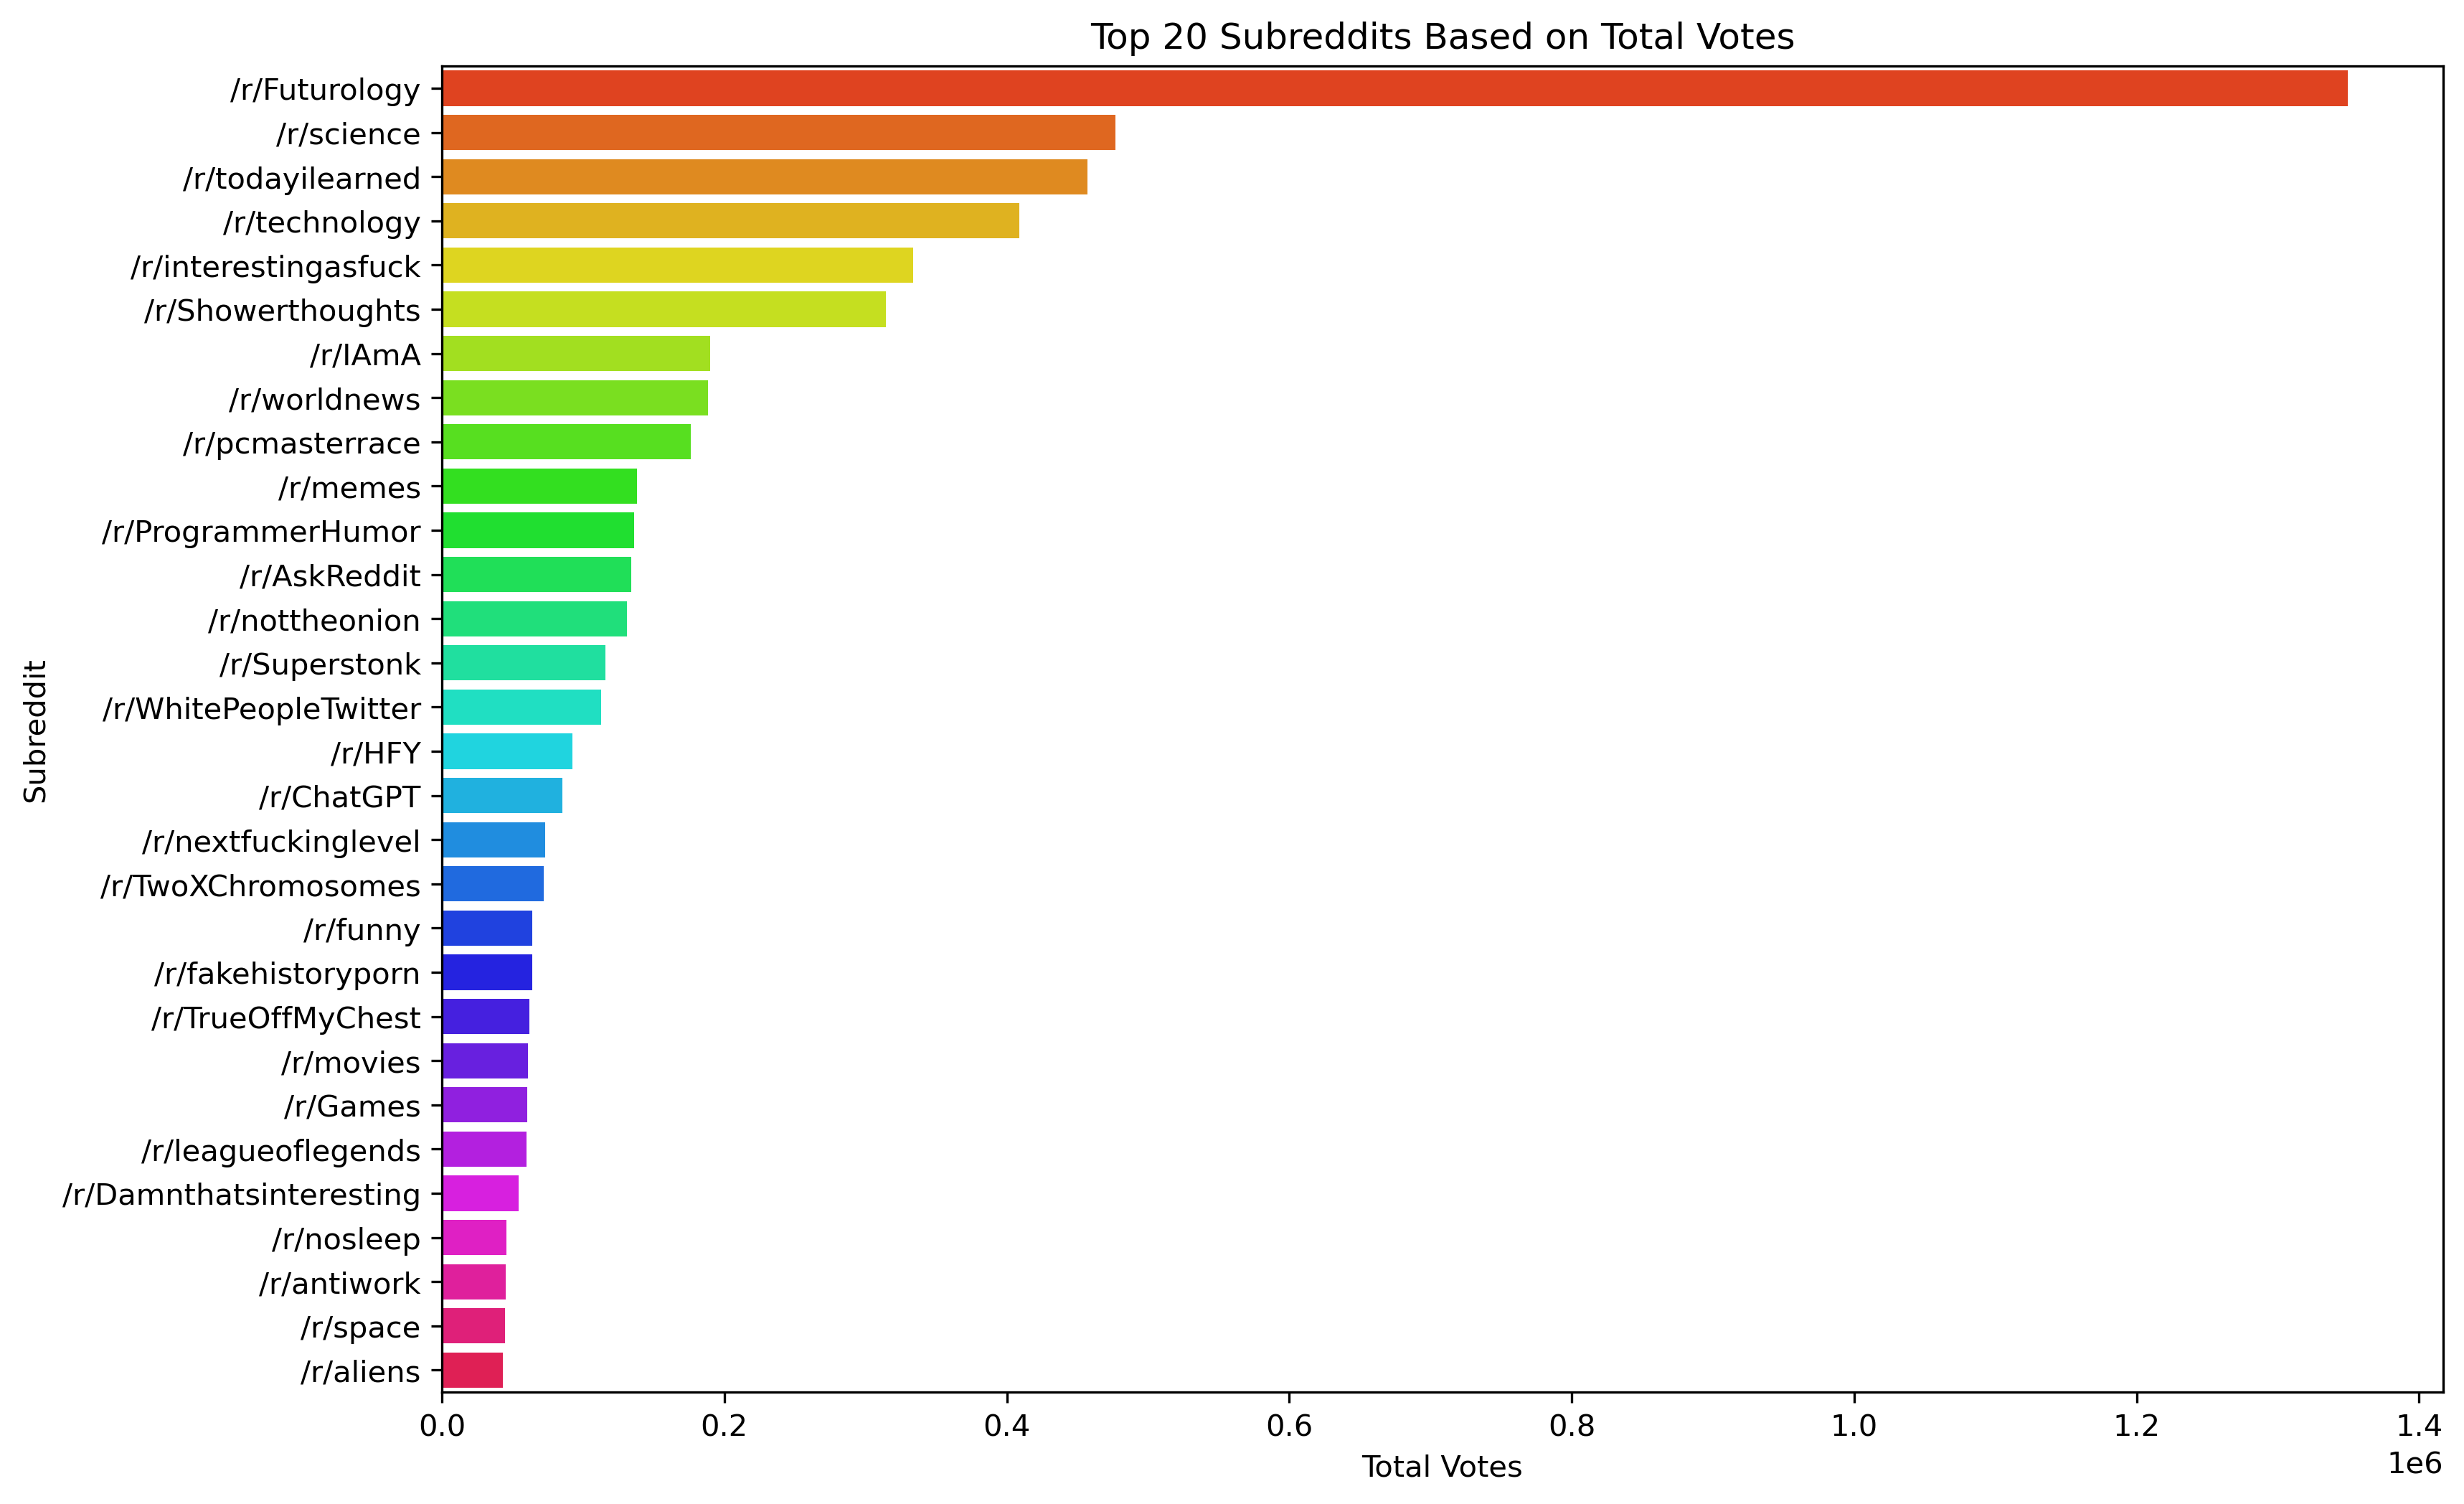

In [351]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded your DataFrame 'df'
# and performed the necessary data preprocessing steps

# Get the top 20 subreddits based on total votes
top_subreddits_votes = df.groupby('Subreddit')['Votes'].sum().reset_index()
top_subreddits_votes = top_subreddits_votes.sort_values(by='Votes', ascending=False).head(30)

# Create a bar chart for the distribution of posts across the top 20 subreddits based on votes
plt.figure(figsize=(12, 8), dpi=300)
sns.barplot(x='Votes', y='Subreddit', data=top_subreddits_votes, palette='hsv')
plt.xlabel('Total Votes')
plt.ylabel('Subreddit')
plt.title('Top 20 Subreddits Based on Total Votes')
plt.show()




In [379]:
df = pd.read_csv("post_data_from_all_time_top_relevance_most-comments.csv")
#df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', infer_datetime_format=True)
df['DayOfWeek'] = df['Date'].dt.day_name()
df['HourOfDay'] = df['Date'].dt.hour
heatmap_data = df.pivot_table(index='DayOfWeek', columns='HourOfDay', 
                              values='Title', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 8), dpi=300)
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt="d", cbar_kws={'label': 'Number of Posts'})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.title('Heatmap of Posting Activity by Day of Week and Hour of Day', fontsize=14)

plt.show()

/var/folders/43/f72n_qsd4k72fjwr1ln5c9y40000gn/T/ipykernel_990/2837552562.py:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df['DayOfWeek'] = df['Date'].dt.day_name()


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 3600x2400 with 0 Axes>

In [356]:
df.pivot_table(index='DayOfWeek', columns='HourOfDay', values='Title', aggfunc='count', fill_value=0)

Empty DataFrame
Columns: []
Index: []

In [360]:
df = pd.read_csv("post_data_from_all_time_top_relevance_most-comments.csv")
#df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], format='%A, %B %d, %Y at %I:%M:%S %p %Z', errors='coerce')

df = df.dropna(subset=['Date'])
df['DayOfWeek'] = df['Date'].dt.day_name()
df['HourOfDay'] = df['Date'].dt.hour
heatmap_data = df.pivot_table(index='DayOfWeek', columns='HourOfDay', 
                              values='Title', aggfunc='count', fill_value=0)

In [357]:
heatmap_data

Empty DataFrame
Columns: []
Index: []

In [361]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print(df['Date'])


Series([], Name: Date, dtype: datetime64[ns])


In [363]:
(df['Date'].head())

Series([], Name: Date, dtype: datetime64[ns])

In [364]:
print(df['Date'].head())


Series([], Name: Date, dtype: datetime64[ns])


In [365]:
df

Empty DataFrame
Columns: [Title, Subreddit, Date, Votes, Comments, DayOfWeek, HourOfDay]
Index: []

In [373]:
df = pd.read_csv("post_data_from_all_time_top_relevance_most-comments.csv")

In [374]:
df['Date']

0        Friday, December 28, 2018 at 4:15:05 AM PST
1           Tuesday, June 15, 2021 at 7:30:52 AM PDT
2           Sunday, March 29, 2020 at 4:50:56 AM PDT
3       Sunday, December 20, 2020 at 10:20:00 PM PST
4       Saturday, December 9, 2017 at 7:40:42 AM PST
                           ...                      
734           Monday, May 25, 2020 at 7:46:48 PM PDT
735      Wednesday, April 21, 2021 at 4:57:04 AM PDT
736        Saturday, July 15, 2023 at 9:23:02 AM PDT
737    Saturday, December 11, 2021 at 8:20:22 PM PST
738       Wednesday, March 8, 2023 at 4:53:08 PM PST
Name: Date, Length: 739, dtype: object

In [375]:
df['DayOfWeek'] = df['Date'].dt.day_name()
df['HourOfDay'] = df['Date'].dt.hour

print(df[['Date', 'DayOfWeek', 'HourOfDay']])


AttributeError: Can only use .dt accessor with datetimelike values

In [378]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', infer_datetime_format=True)
df['DayOfWeek'] = df['Date'].dt.day_name()
df['HourOfDay'] = df['Date'].dt.hour

/var/folders/43/f72n_qsd4k72fjwr1ln5c9y40000gn/T/ipykernel_990/801217623.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df['DayOfWeek'] = df['Date'].dt.day_name()


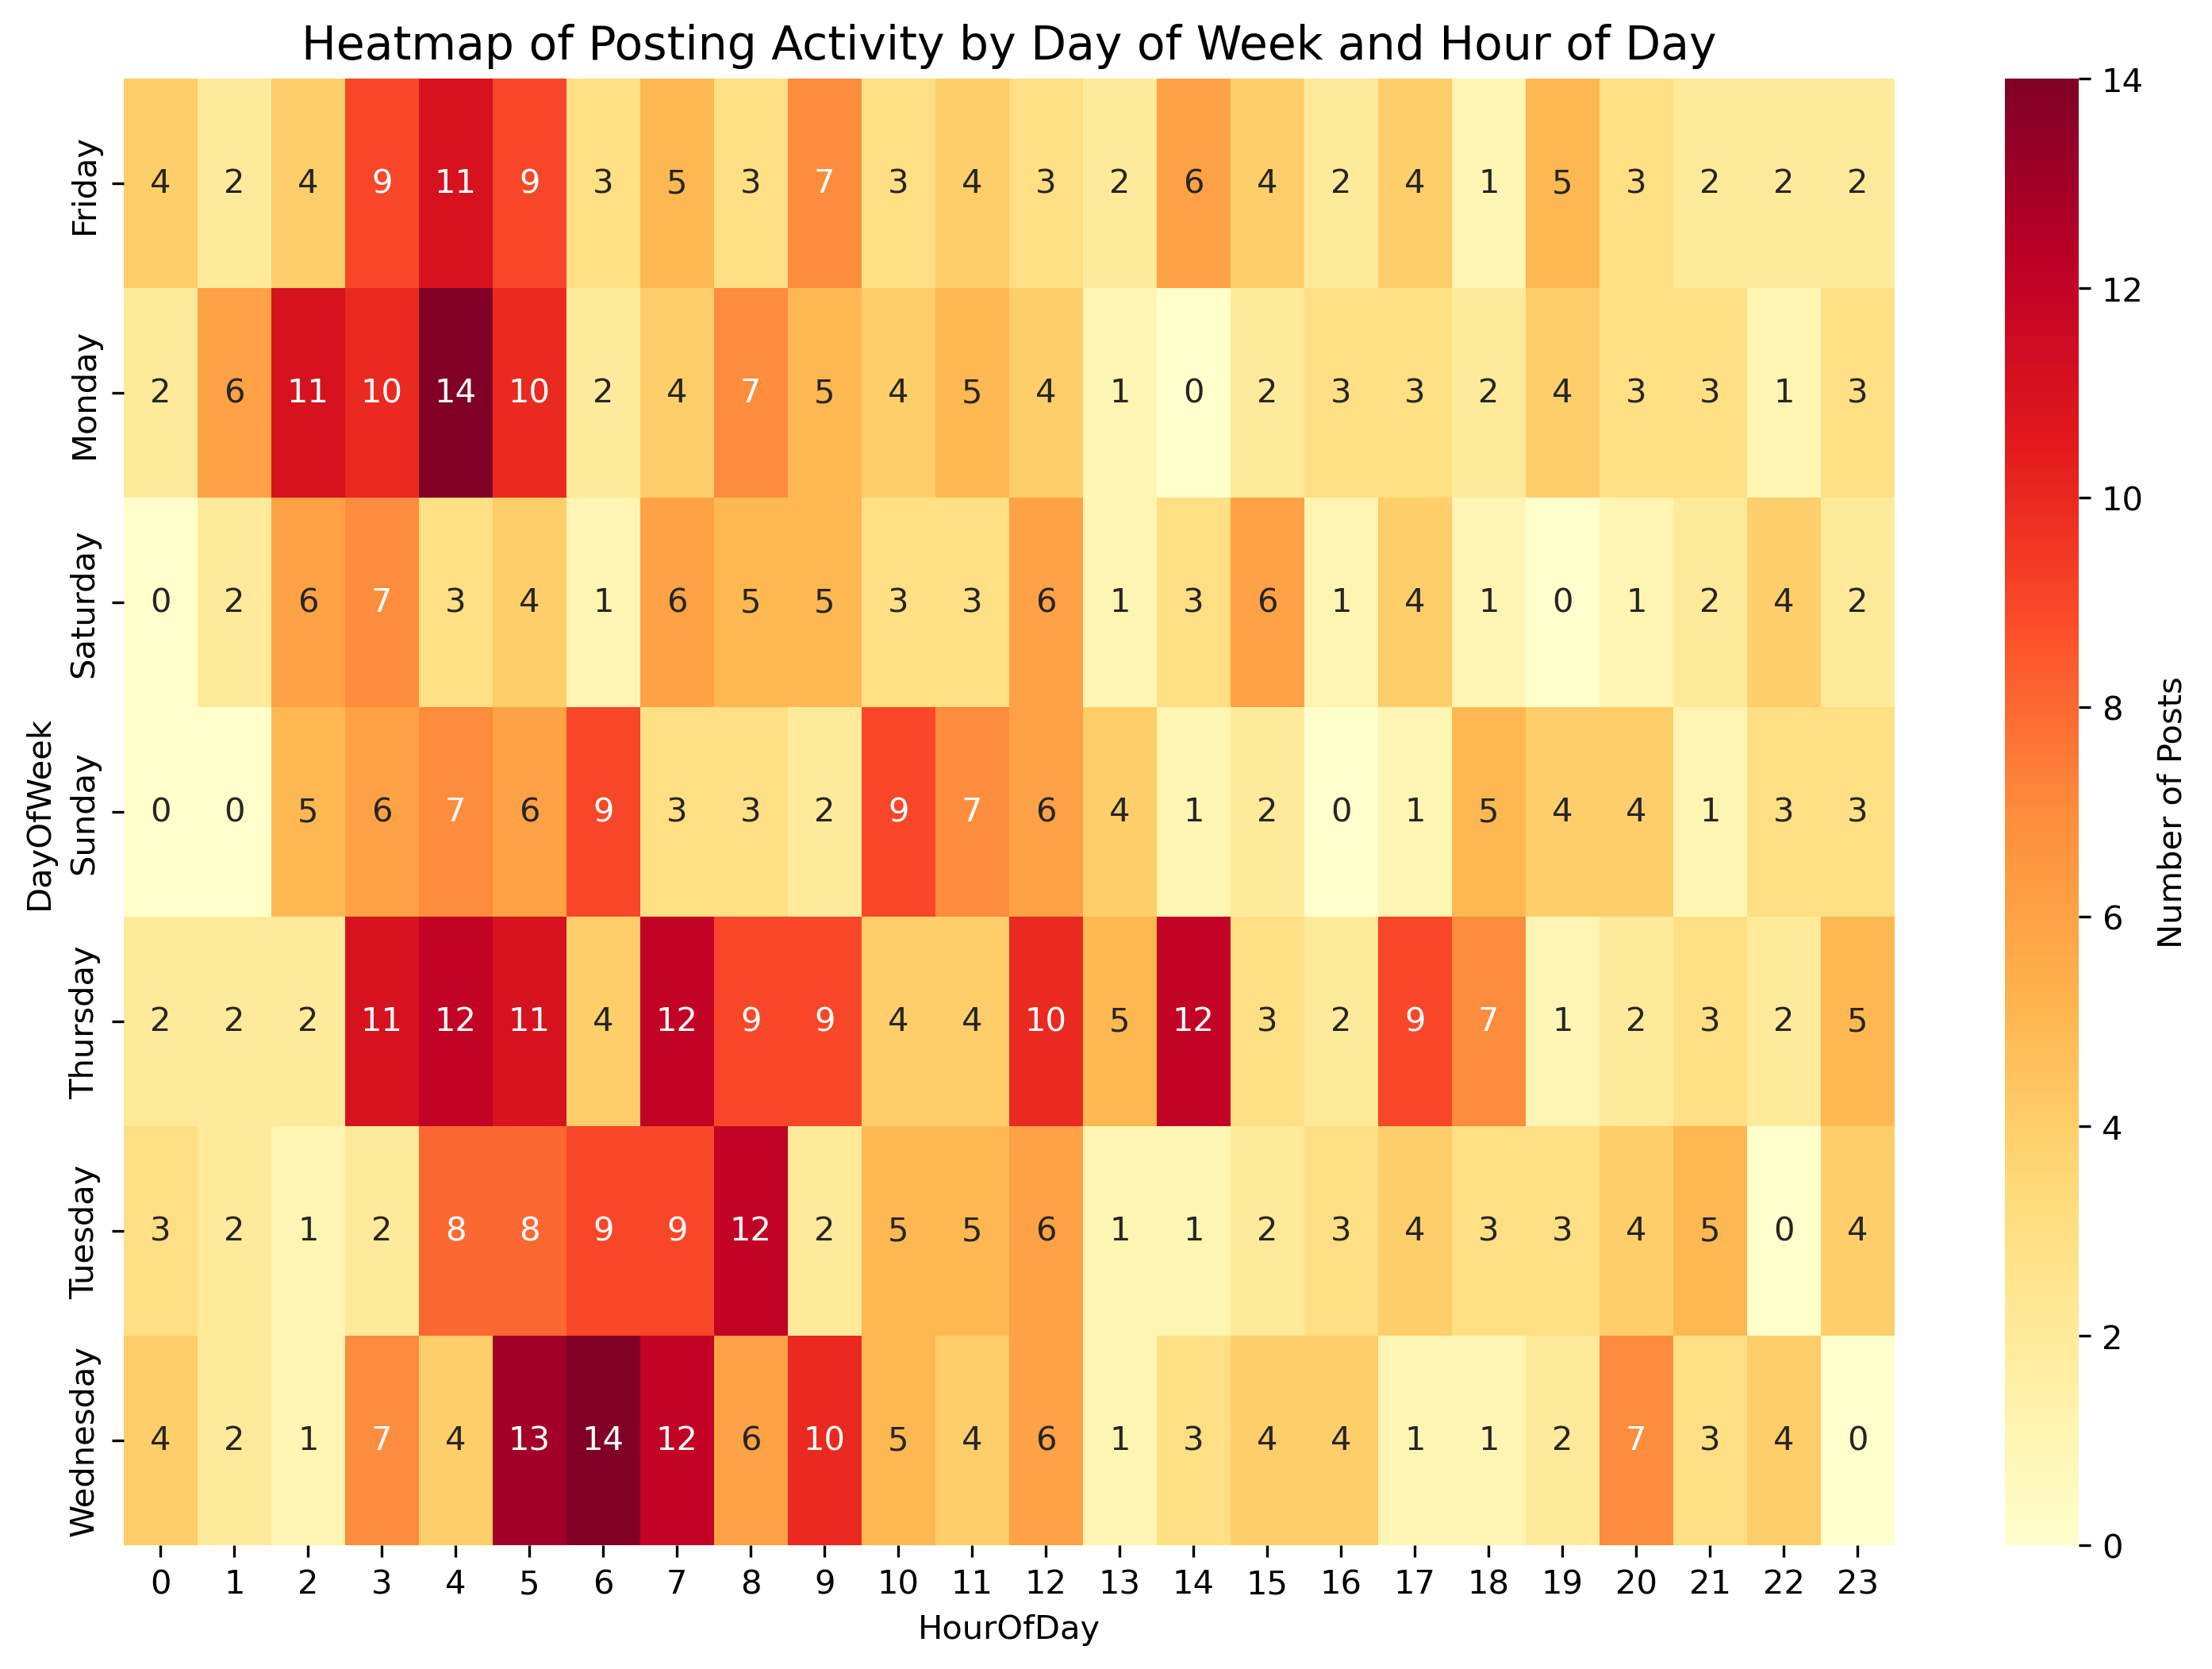

In [385]:
# Check the current data types of the 'Date' column
df = pd.read_csv("post_data_from_all_time_top_relevance_most-comments.csv")


# Convert 'Date' to datetime with a different approach
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df['DayOfWeek'] = df['Date'].dt.day_name()
df['HourOfDay'] = df['Date'].dt.hour
heatmap_data = df.pivot_table(index='DayOfWeek', columns='HourOfDay', values='Title', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 8), dpi=300)
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt="d", cbar_kws={'label': 'Number of Posts'})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Heatmap of Posting Activity by Day of Week and Hour of Day', fontsize=14)
plt.show()


In [395]:
df = pd.read_csv("post_data_from_all_time_top_relevance_most-comments.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%Y-%m-%d %H:%M:%S').dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
# Existing code
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['DayOfWeek'] = df['Date'].dt.day_name()

# Addressing the warning
df['DayOfWeek'] = df['DayOfWeek'].astype('category')  # Explicitly convert to category type

# Rest of your code

#df = df.dropna(subset=['Date'])
df['DayOfWeek'] = df['Date'].dt.day_name()
df['HourOfDay'] = df['Date'].dt.hour
 # Convert to float or another numeric type

heatmap_data = df.pivot_table(index='DayOfWeek', columns='HourOfDay', values='Title', aggfunc='count', fill_value=0)


/var/folders/43/f72n_qsd4k72fjwr1ln5c9y40000gn/T/ipykernel_990/1870363073.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df['DayOfWeek'] = df['Date'].dt.day_name()
/var/folders/43/f72n_qsd4k72fjwr1ln5c9y40000gn/T/ipykernel_990/1870363073.py:13: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df['DayOfWeek'] = df['Date'].dt.day_name()


In [394]:
heatmap_data

Empty DataFrame
Columns: []
Index: []

In [399]:
df = pd.read_csv("post_data_from_all_time_top_relevance_most-comments.csv")
df = df.dropna(subset=['Date'])
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%Y-%m-%d %H:%M:%S').dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
df['DayOfWeek'] = df['Date'].dt.day_name()
df['HourOfDay'] = df['Date'].dt.hour
df['DayOfWeek'] = df['DayOfWeek'].astype('category') 
print(df)

                                                 Title  \
0    If humans were ever to prove the theory that o...   
1    Artificial intelligence based translator of Am...   
2    We create a sentient artificial intelligence a...   
3    TIL that Jurassic Park's visual effects were s...   
4                              Artificial Intelligence   
..                                                 ...   
734    Artificial intelligence grad program comparison   
735  Europe proposes strict regulation of artificia...   
736                                  Best books on AI?   
737  Reddit-trained artificial intelligence warns r...   
738     Artificial Intelligence uses cases in Power Bi   

                   Subreddit Date  Votes  Comments DayOfWeek  HourOfDay  
0          /r/Showerthoughts  NaT  80251      1681       NaN        NaN  
1       /r/interestingasfuck  NaT  77913       850       NaN        NaN  
2               /r/AskReddit  NaT  65558      5614       NaN        NaN  
3      

/var/folders/43/f72n_qsd4k72fjwr1ln5c9y40000gn/T/ipykernel_990/2417660681.py:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df['DayOfWeek'] = df['Date'].dt.day_name()


In [400]:
import pandas as pd

df = pd.read_csv("post_data_from_all_time_top_relevance_most-comments.csv")
df = df.dropna(subset=['Date'])
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%Y-%m-%d %H:%M:%S').dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
df['DayOfWeek'] = df['Date'].dt.day_name()
df['DayOfWeek'] = df['DayOfWeek'].astype('category')
df['HourOfDay'] = df['Date'].dt.hour

print(df)


                                                 Title  \
0    If humans were ever to prove the theory that o...   
1    Artificial intelligence based translator of Am...   
2    We create a sentient artificial intelligence a...   
3    TIL that Jurassic Park's visual effects were s...   
4                              Artificial Intelligence   
..                                                 ...   
734    Artificial intelligence grad program comparison   
735  Europe proposes strict regulation of artificia...   
736                                  Best books on AI?   
737  Reddit-trained artificial intelligence warns r...   
738     Artificial Intelligence uses cases in Power Bi   

                   Subreddit Date  Votes  Comments DayOfWeek  HourOfDay  
0          /r/Showerthoughts  NaT  80251      1681       NaN        NaN  
1       /r/interestingasfuck  NaT  77913       850       NaN        NaN  
2               /r/AskReddit  NaT  65558      5614       NaN        NaN  
3      

/var/folders/43/f72n_qsd4k72fjwr1ln5c9y40000gn/T/ipykernel_990/2865347200.py:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df['DayOfWeek'] = df['Date'].dt.day_name()


In [401]:
import pandas as pd

df = pd.read_csv("post_data_from_all_time_top_relevance_most-comments.csv")
df = df.dropna(subset=['Date'])
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%Y-%m-%d %H:%M:%S').dt.tz_localize('UTC').dt.tz_convert('US/Pacific')

# Extract 'DayOfWeek' and 'HourOfDay' directly
df['DayOfWeek'] = df['Date'].dt.day_name().astype('category')
df['HourOfDay'] = df['Date'].dt.hour

print(df.head())


                                               Title              Subreddit  \
0  If humans were ever to prove the theory that o...      /r/Showerthoughts   
1  Artificial intelligence based translator of Am...   /r/interestingasfuck   
2  We create a sentient artificial intelligence a...           /r/AskReddit   
3  TIL that Jurassic Park's visual effects were s...       /r/todayilearned   
4                            Artificial Intelligence  /r/WhitePeopleTwitter   

  Date  Votes  Comments DayOfWeek  HourOfDay  
0  NaT  80251      1681       NaN        NaN  
1  NaT  77913       850       NaN        NaN  
2  NaT  65558      5614       NaN        NaN  
3  NaT  60404      1738       NaN        NaN  
4  NaT  53198       425       NaN        NaN  


/var/folders/43/f72n_qsd4k72fjwr1ln5c9y40000gn/T/ipykernel_990/2635270006.py:8: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df['DayOfWeek'] = df['Date'].dt.day_name().astype('category')


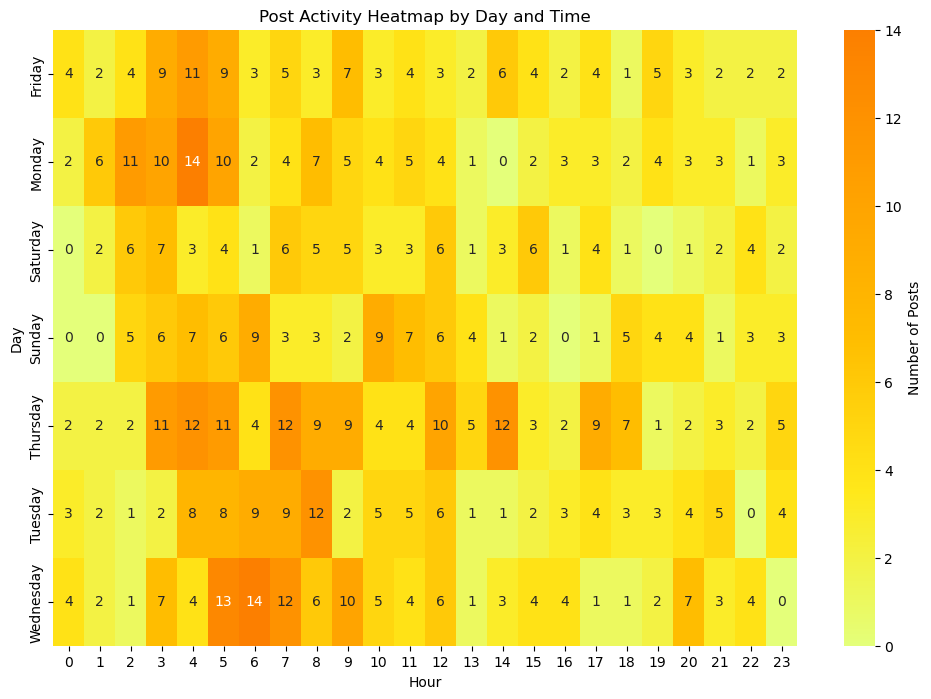

In [416]:
df = pd.read_csv("post_data_from_all_time_top_relevance_most-comments.csv")
from dateutil import parser
df["Date"] = df["Date"].apply(lambda x: parser.parse(x))

# Extract day and hour information
df["Day"] = df["Date"].dt.day_name()
df["Hour"] = df["Date"].dt.hour

# Create a pivot table
heatmap_data = df.pivot_table(index="Day", columns="Hour", values="Title", aggfunc="count", fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="Wistia", annot=True, fmt="d", cbar_kws={'label': 'Number of Posts'})
plt.title("Post Activity Heatmap by Day and Time")
plt.show()